### Packages:

In [13]:
#Analysis:
import pandas as pd
import numpy as np
import os
import math

#Plotting:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona #print(fiona.__version__)
%matplotlib inline

### Data Files:

#### *Enter File Path*:

In [14]:
root_path='/Users/SamLongenbach/Desktop/DS504/project2/DS504-Divvy-Project/'
os.chdir(root_path)

In [15]:
trip_files = { # data file : file path
     'Divvy_Trips_2013.csv' : 'Divvy_Data/Divvy_Stations_Trips_2013',
     'Divvy_Trips_2014_Q1Q2.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q1Q2',
     'Divvy_Trips_2014-Q3-07.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q3Q4',
     'Divvy_Trips_2014-Q3-0809.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q3Q4',
     'Divvy_Trips_2014-Q4.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q3Q4',
     'Divvy_Trips_2015-Q1.csv' : 'Divvy_Data/Divvy_Trips_2015-Q1Q2',
     'Divvy_Trips_2015-Q2.csv' : 'Divvy_Data/Divvy_Trips_2015-Q1Q2',
     'Divvy_Trips_2015_07.csv' : 'Divvy_Data/Divvy_Trips_2015_Q3Q4',
     'Divvy_Trips_2015_08.csv' : 'Divvy_Data/Divvy_Trips_2015_Q3Q4',
     'Divvy_Trips_2015_09.csv' : 'Divvy_Data/Divvy_Trips_2015_Q3Q4',
     'Divvy_Trips_2015_Q4.csv' : 'Divvy_Data/Divvy_Trips_2015_Q3Q4',
     'Divvy_Trips_2016_Q1.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Trips_2016_04.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Trips_2016_05.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Trips_2016_06.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Trips_2016_Q3.csv' : 'Divvy_Data/Divvy_Trips_2016_Q3Q4',
     'Divvy_Trips_2016_Q4.csv' : 'Divvy_Data/Divvy_Trips_2016_Q3Q4',
     'Divvy_Trips_2017_Q1.csv' : 'Divvy_Data/Divvy_Trips_2017_Q1Q2',
     'Divvy_Trips_2017_Q2.csv' : 'Divvy_Data/Divvy_Trips_2017_Q1Q2',
     'Divvy_Trips_2017_Q3.csv' : 'Divvy_Data/Divvy_Trips_2017_Q3Q4',
     'Divvy_Trips_2017_Q4.csv' : 'Divvy_Data/Divvy_Trips_2017_Q3Q4',
     'Divvy_Trips_2018_Q1.csv' : 'Divvy_Data/', 
     'Divvy_Trips_2018_Q2.csv' : 'Divvy_Data/', 
     'Divvy_Trips_2018_Q3.csv' : 'Divvy_Data/', 
     'Divvy_Trips_2018_Q4.csv' : 'Divvy_Data/'}

station_files = { # data file : file path
     'Divvy_Stations_2013.csv' : 'Divvy_Data/Divvy_Stations_Trips_2013', 
     'Divvy_Stations_2014-Q1Q2.xlsx' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q1Q2',
     'Divvy_Stations_2014-Q3Q4.csv' : 'Divvy_Data/Divvy_Stations_Trips_2014_Q3Q4',
     'Divvy_Stations_2015.csv' : 'Divvy_Data/Divvy_Trips_2015-Q1Q2',
     'Divvy_Stations_2016_Q1Q2.csv' : 'Divvy_Data/Divvy_Trips_2016_Q1Q2',
     'Divvy_Stations_2016_Q4.csv' : 'Divvy_Data/Divvy_Trips_2016_Q3Q4',
     'Divvy_Stations_2017_Q1Q2.csv' : 'Divvy_Data/Divvy_Trips_2017_Q1Q2',
     'Divvy_Stations_2017_Q3Q4.csv' : 'Divvy_Data/Divvy_Trips_2017_Q3Q4' 
}

### Load Station Data:

In [16]:
file, folder = list(station_files.items())[0]
os.chdir(root_path + folder)
S_2013 = pd.read_csv(file) ##

#file, folder = list(station_files.items())[1]
#os.chdir(root_path + folder)
#S_2014_Q12 = pd.read_csv(file)

file, folder = list(station_files.items())[2]
os.chdir(root_path + folder)
S_2014_Q34 = pd.read_csv(file) ##

file, folder = list(station_files.items())[3]
os.chdir(root_path + folder)
S_2015_Q12 = pd.read_csv(file) ##

file, folder = list(station_files.items())[4]
os.chdir(root_path + folder)
S_2016_Q12 = pd.read_csv(file) ##

file, folder = list(station_files.items())[5]
os.chdir(root_path + folder)
S_2016_Q34 = pd.read_csv(file) ##

file, folder = list(station_files.items())[6]
os.chdir(root_path + folder)
S_2017_Q12 = pd.read_csv(file) ##

file, folder = list(station_files.items())[7]
os.chdir(root_path + folder)
S_2017_Q34 = pd.read_csv(file) ##

### Most Recent Stations 2019:

In [17]:
import json
import requests

url = 'https://feeds.divvybikes.com/stations/stations.json'
r  = requests.get(url)
r_load = json.loads(r.text)
S_2019 = pd.DataFrame.from_records(r_load['stationBeanList']) #[['id','availableBikes','availableDocks','totalDocks','status','lastCommunicationTime','is_renting','longitude','latitude']]

In [18]:
old = S_2013['id']
new = S_2019['id']

print(len(np.setdiff1d(old,new)))
print(len(np.setdiff1d(new,old)))

0
308


### Plot of Station Locations:

In [19]:
l = list()
for i in S_2019['id']: #Most recent Station csv file
    if i in S_2013['id'].tolist():
        l.append("2013/2014")
    elif i in S_2015_Q12['id'].tolist():
        l.append("2015")
    elif i in S_2016_Q34['id'].tolist():   
        l.append("2016")
    elif i in S_2017_Q34['id'].tolist(): 
        l.append("2017")
    else:
        l.append("2018/2019")

S_2019['Existence'] = l

#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
S_points = [Point(xy) for xy in zip(S_2019['longitude'],S_2019['latitude'])] 
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(S_2019,
                         crs = crs,
                         geometry = S_points)
chi_map = gpd.read_file(root_path + 'chi_town.shp')

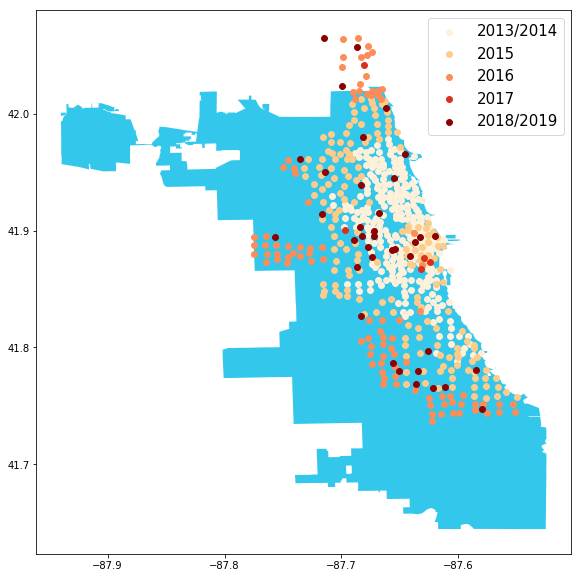

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
chi_map.plot(ax=ax,alpha=0.8,color="#00b9e7")
#geo_df.plot(ax=ax,markersize=20)
pt_size = 35
geo_df[geo_df['Existence']=='2013/2014'].plot(ax=ax,markersize=pt_size,color="#fef0d9",label="2013/2014")
geo_df[geo_df['Existence']=='2015'].plot(ax=ax,markersize=pt_size,color="#fdcc8a",label="2015")
geo_df[geo_df['Existence']=='2016'].plot(ax=ax,markersize=pt_size,color="#fc8d59",label="2016")
geo_df[geo_df['Existence']=='2017'].plot(ax=ax,markersize=pt_size,color="#d7301f",label="2017")
geo_df[geo_df['Existence']=='2018/2019'].plot(ax=ax,markersize=pt_size,color="#8b0000",label="2018/2019")
plt.legend(prop={'size':15})
#for i, txt in enumerate(geo_df['id']):
#    ax.annotate(txt, (geo_df['longitude'][i], geo_df['latitude'][i]))

In [21]:
geo_df

,altitude,availableBikes,availableDocks,city,id,is_renting,kioskType,landMark,lastCommunicationTime,latitude,...,stAddress1,stAddress2,stationName,status,statusKey,statusValue,testStation,totalDocks,Existence,geometry
0,,2,36,Chicago,2,True,K3_FULL,15541,2019-04-26 13:28:24,41.876470,...,Buckingham Fountain,,Buckingham Fountain,IN_SERVICE,1,In Service,False,39,2015,POINT (-87.62034 41.87647)
1,,8,47,Chicago,3,True,K3_FULL,15544,2019-04-26 13:28:12,41.867226,...,Shedd Aquarium,,Shedd Aquarium,IN_SERVICE,1,In Service,False,55,2015,POINT (-87.61535539019999 41.86722595682)
2,,9,14,Chicago,4,True,K3_FULL,15545,2019-04-26 13:26:03,41.856268,...,Burnham Harbor,,Burnham Harbor,IN_SERVICE,1,In Service,False,23,2015,POINT (-87.613348 41.856268)
3,,9,14,Chicago,5,True,K3_FULL,13030,2019-04-26 13:25:59,41.874053,...,State St & Harrison St,,State St & Harrison St,IN_SERVICE,1,In Service,False,23,2013/2014,POINT (-87.62771600000001 41.874053)
4,,10,29,Chicago,6,True,K3_FULL,15548,2019-04-26 13:28:40,41.886976,...,Dusable Harbor,,Dusable Harbor,IN_SERVICE,1,In Service,False,39,2015,POINT (-87.612813 41.886976)
5,,18,1,Chicago,7,True,K3_FULL,15534,2019-04-26 13:26:18,41.886349,...,Field Blvd & South Water St,,Field Blvd & South Water St,IN_SERVICE,1,In Service,False,19,2015,POINT (-87.6175165471 41.88634906269)
6,,4,11,Chicago,9,True,K3_FULL,15695,2019-04-26 13:27:12,41.828792,...,Leavitt St & Archer Ave,,Leavitt St & Archer Ave,IN_SERVICE,1,In Service,False,15,2015,POINT (-87.6806044594 41.82879201994)
7,,4,7,Chicago,11,True,K3_FULL,15496,2019-04-26 13:27:52,41.766638,...,Jeffery Blvd & 71st St,,Jeffery Blvd & 71st St,IN_SERVICE,1,In Service,False,11,2015,POINT (-87.5764501141 41.76663823695)
8,,1,14,Chicago,12,True,K3_FULL,15497,2019-04-26 13:28:08,41.766409,...,South Shore Dr & 71st St,,South Shore Dr & 71st St,IN_SERVICE,1,In Service,False,15,2015,POINT (-87.5656875719 41.7664094567)
9,,18,17,Chicago,13,True,K3_FULL,13066,2019-04-26 13:25:50,41.932418,...,Wilton Ave & Diversey Pkwy,,Wilton Ave & Diversey Pkwy,IN_SERVICE,1,In Service,False,35,2013/2014,POINT (-87.652705 41.932418)


### Clustering Matrix 

#### *Enter Station File to Create Matrix*: ex. S_2013, S_2014_Q34, ... S_2017_Q34

In [22]:
STATION_DATA = S_2019.sort_values(by=['id']) #S_2013.sort_values(by=['id']) # Always sort Ids so they match Time Matrix below

In [25]:
def column_rename(df): #Because Divvy_Trips_2018_Q1.csv is formatted with odd column names
    df = df.rename(index=str, columns={"01 - Rental Details Rental ID": "trip_id",
                              "01 - Rental Details Local Start Time": "start_time",
                              "01 - Rental Details Local End Time": "end_time",
                              "01 - Rental Details Bike ID": "bikeid",
                              "01 - Rental Details Duration In Seconds Uncapped": "tripduration",
                              "03 - Rental Start Station ID": "from_station_id",
                              "03 - Rental Start Station Name": "to_station_name",
                              "02 - Rental End Station ID": "to_station_id",
                              "02 - Rental End Station Name": "to_station_name",
                              "User Type": "usertype",
                              "Member Gender": "gender",
                              "05 - Member Details Member Birthday Year": "birthyear"})
    return df

In [27]:
def remove_extinct_station_data(Station_Ids, Trip_Data):
    from_id = 'from_station_id'
    to_id = 'to_station_id'

    fr = np.setdiff1d(Trip_Data[from_id],Station_Ids)
    to = np.setdiff1d(Trip_Data[to_id],Station_Ids)
    extinct_ids = list(np.union1d(fr,to))
    print(extinct_ids)
    if len(extinct_ids)==0:
        return Trip_Data
    else:
        for ex_id in extinct_ids:
            Trip_Data = Trip_Data[Trip_Data[from_id]!=ex_id]
            Trip_Data = Trip_Data[Trip_Data[to_id]!=ex_id]
    return Trip_Data   

def remove_long_rides(Trip_Data,limit):
    if Trip_Data['tripduration'].dtypes=='O':
        Trip_Data['tripduration'] = Trip_Data['tripduration'].str.replace(",","").astype(float)
        
    Trip_Data = Trip_Data[Trip_Data['tripduration']<limit]
    return Trip_Data

In [30]:
def date_to_hour(date_column):
    L = []
    for t in date_column:
        time = str(t).split(" ")[1]
        hour = int(time.split(":")[0])
        L.append(hour)
    return L    

In [19]:
def trip_hour_matrix(Station_Ids, Trip_Data):
    try:
        Trip_Data["hour"] = date_to_hour(Trip_Data['starttime'])
    except:
        Trip_Data["hour"] = date_to_hour(Trip_Data['start_time'])
    dim = len(Station_Ids)
    C = np.zeros((dim,48))
    Trip_Dat = Trip_Data[['hour','from_station_id','to_station_id','trip_id']]
    for i,i_d in enumerate(Station_Ids):
        leaving = Trip_Dat[Trip_Dat['from_station_id']==i_d].groupby(["hour"]).count()['trip_id']
        arriving = Trip_Dat[Trip_Dat['to_station_id']==i_d].groupby(["hour"]).count()['trip_id']
        for h in leaving.index:
            h = int(h)
            C[i,h] = leaving[h]
        for h in arriving.index:    
            h = int(h)
            C[i,h+24] = arriving[h]   
    return C        

In [20]:
#STATION_DATA = S_2019.sort_values(by=['id'])
Station_Ids = STATION_DATA['id'] #Use ordered ids from above so Distance Matrix matches Time Matrix
dim = len(Station_Ids)
Clust = np.zeros((dim,48)) #24hours
for f in range(len(trip_files)):
    file, folder = list(trip_files.items())[f]
    os.chdir(root_path + folder)
    print(f,':--------')
    Trip_CSV_f = pd.read_csv(file)
    if file=="Divvy_Trips_2018_Q1.csv": #patch
        Trip_CSV_f = column_rename(Trip_CSV_f)
    print(file,'Entries:',Trip_CSV_f.shape[0])
    Trip_Data = remove_extinct_station_data(Station_Ids, Trip_CSV_f)
    print('Entries Removed:',(Trip_CSV_f.shape[0] - Trip_Data.shape[0]))
    #------------------------------------------------------
    C = trip_hour_matrix(Station_Ids, Trip_Data)
    Clust = Clust + C      

0 :--------


/Users/SamLongenbach/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Divvy_Trips_2013.csv Entries: 759788
[]
Entries Removed: 0
1 :--------
Divvy_Trips_2014_Q1Q2.csv Entries: 905699
[]
Entries Removed: 0
2 :--------
Divvy_Trips_2014-Q3-07.csv Entries: 410340
[]
Entries Removed: 0
3 :--------
Divvy_Trips_2014-Q3-0809.csv Entries: 700630
[]
Entries Removed: 0
4 :--------
Divvy_Trips_2014-Q4.csv Entries: 437965
[]
Entries Removed: 0
5 :--------
Divvy_Trips_2015-Q1.csv Entries: 202349
[]
Entries Removed: 0
6 :--------
Divvy_Trips_2015-Q2.csv Entries: 893890
[372, 397]
Entries Removed: 1142
7 :--------
Divvy_Trips_2015_07.csv Entries: 533711
[372, 397]
Entries Removed: 949
8 :--------
Divvy_Trips_2015_08.csv Entries: 495029
[372, 397]
Entries Removed: 928
9 :--------
Divvy_Trips_2015_09.csv Entries: 427095
[372, 397]
Entries Removed: 703
10 :--------
Divvy_Trips_2015_Q4.csv Entries: 631365
[372, 397]
Entries Removed: 954
11 :--------
Divvy_Trips_2016_Q1.csv Entries: 396913
[372, 397]
Entries Removed: 243
12 :--------
Divvy_Trips_2016_04.csv Entries: 231635
[

### Save Matrix:

In [103]:
CC=pd.DataFrame(Clust, index=STATION_DATA['id'])
os.chdir(root_path)
np.savetxt("cluster_matrix.csv",Clust)

CC.to_csv("cluster_matrix_R.csv")

### Clustering Analysis:

In [6]:
os.chdir(root_path)
Clust_load = np.loadtxt(root_path+"cluster_matrix.csv")

In [35]:
sum(np.sum(Clust_load,axis=1))


34803116.0

In [60]:
#S_2019[np.sum(Clust, axis=1)<1]
total_out = np.sum(Clust_load[:,:24],axis=1)
total_in = np.sum(Clust_load[:,24:],axis=1)
total_out_mat = np.array([total_out,]*24).transpose()
total_in_mat = np.array([total_in,]*24).transpose()
DD = np.concatenate((total_out_mat, total_in_mat), axis=1)

In [107]:
DDDD=pd.DataFrame(DD, index=STATION_DATA['id'])
DDDD.to_csv("cluster_matrix_sum_R.csv")

In [61]:
Cluster_df = Clust_load/DD
Cluster_df2 = Cluster_df[total_out + total_in > 10000]

/Users/SamLongenbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [119]:
# Difference btw out and in 
#O = Cluster_df[:,:24]
#I = Cluster_df[:,24:]
#Cluster_df2 = pd.DataFrame(np.concatenate((Cluster_df,(O-I)), axis=1))
#Cluster_df2 = Cluster_df2[total_out + total_in > 10000]

In [120]:
from sklearn.decomposition import PCA
comps = 5
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(Cluster_df2)
principalDf = pd.DataFrame(data = principalComponents)
print("Components",comps,"explained_variance:",sum(pca.explained_variance_ratio_[:comps]))

Components 5 explained_variance: 0.8971380356290047


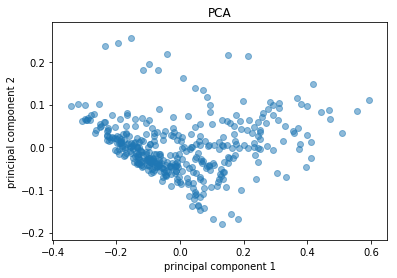

In [121]:
plt.scatter(principalDf[0],principalDf[1],alpha=0.5)
plt.title('PCA')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

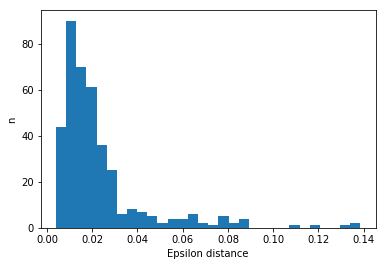

In [122]:
def calculate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                math.sqrt(
                    ((X[i,0] - X[j,0]) ** 2) +
                    ((X[i,1] - X[j,1]) ** 2)))

        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance

eps_dist = calculate_kn_distance(principalDf.values,4)
plt.hist(eps_dist,bins=30)
plt.ylabel('n');
plt.xlabel('Epsilon distance');

In [125]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.06, min_samples=5).fit(principalDf)
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Clusters:",n_clusters_)
print("Noise:",n_noise_)

Clusters: 3
Noise: 71


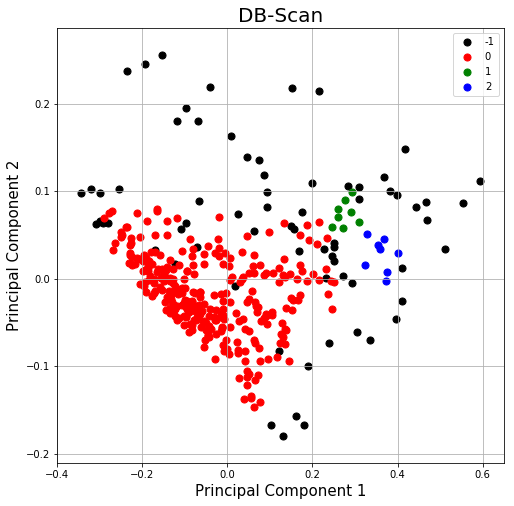

In [126]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('DB-Scan', fontsize = 20)

targets = [-1,0, 1, 2]
colors = ['black','r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = clustering.labels_ == target
    ax.scatter(principalDf.loc[indicesToKeep, 0]
               , principalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [127]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(principalDf.values)
#kmeans.labels_

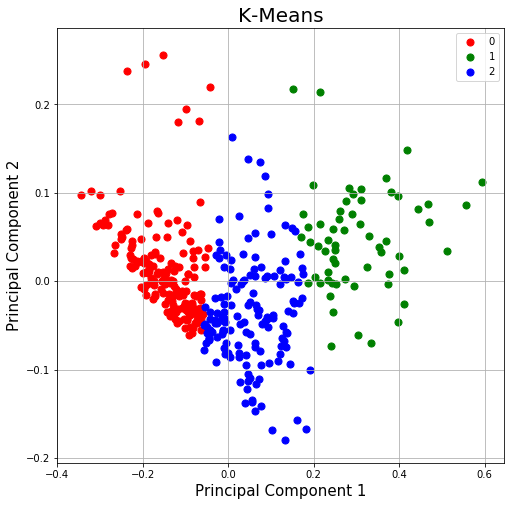

In [128]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K-Means', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = kmeans.labels_ == target
    ax.scatter(principalDf.loc[indicesToKeep, 0]
               , principalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [129]:
import time
from sklearn.manifold import TSNE

In [130]:
comps = 5
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(Cluster_df2)
#principalDf = pd.DataFrame(data = principalComponents)
print("Components",comps,"explained_variance: {}".format(np.sum(pca.explained_variance_ratio_)))

Components 5 explained_variance: 0.8971380356290047


In [131]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=600)
tsne_pca_results = tsne.fit_transform(principalComponents)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 387 samples in 0.000s...
[t-SNE] Computed neighbors for 387 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 387 / 387
[t-SNE] Mean sigma: 0.073867
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.122536
[t-SNE] KL divergence after 600 iterations: 0.183889
t-SNE done! Time elapsed: 3.156705141067505 seconds


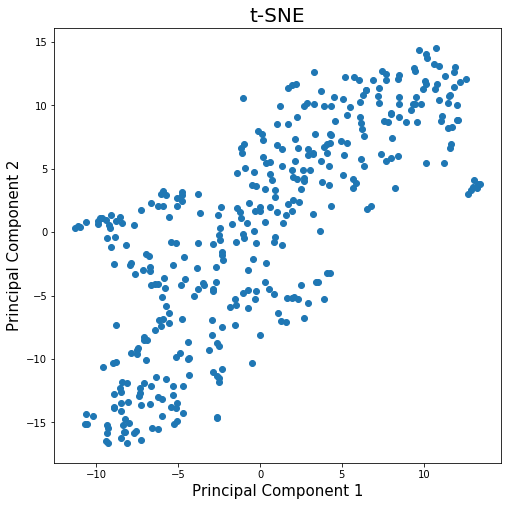

In [132]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('t-SNE', fontsize = 20)

ax.scatter(x=tsne_df.loc[:, 0],
           y=tsne_df.loc[:, 1])



In [7]:
hmm = pd.read_csv('Historical_Bikes_In.csv',dtype={"Station":object})
hmm['Station'][1]

'3'

In [16]:
file, folder = list(trip_files.items())[24]
os.chdir(root_path + folder)
Trip_CSV_f = pd.read_csv(file)
abc = Trip_CSV_f[Trip_CSV_f['from_station_id']==62]

In [34]:
def date_to_month_day(date_column):
    L = []
    for t in date_column:
        time = str(t).split(" ")[0]
        month = str(time.split("-")[1])
        day = str(time.split("-")[2])
        L.append(month+"-"+day)
    return L   

In [36]:
abc['date'] = date_to_month_day(abc['start_time'])

/Users/SamLongenbach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
deff = abc[abc["date"]=="10-05"]

In [40]:
deff.to_csv("abc.csv")